In [370]:
import pandas as pd                    
import numpy as np                     
import matplotlib.pyplot as plt        
import seaborn as sns                 
import scipy.stats
import statsmodels.formula.api as smf 

In [371]:
#I am using Medical Expenditure Panel Survey (MEPS) 2015 full year consolidated data.
#First, drop columns I don't need
cols_to_keep=['age15x','sex','racethx','hideg','povcat15','hwellspe','prvspk42','adappt42', 'adlist42','adexpl42', 'adresp42','adprtm42','adinst42','adhecr42','rthlth53','mnhlth31' ]
meps15=  pd.read_stata('h181.dta', columns = cols_to_keep)
meps15.head()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31
0,53.0,1.0,2.0,-1.0,1.0,-1.0,-1.0,6.0,4.0,4.0,4.0,4.0,1.0,9.0,4.0,1.0
1,56.0,2.0,2.0,-1.0,3.0,-1.0,-1.0,4.0,4.0,4.0,4.0,4.0,1.0,8.0,4.0,1.0
2,30.0,1.0,2.0,-1.0,3.0,-1.0,-1.0,2.0,2.0,3.0,3.0,3.0,2.0,9.0,1.0,1.0
3,23.0,2.0,2.0,-1.0,2.0,-1.0,-1.0,4.0,3.0,3.0,3.0,3.0,2.0,8.0,1.0,1.0
4,3.0,1.0,2.0,-1.0,2.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [372]:
#creating subsets by English proficiency levels. 
well15 = meps15[(meps15['hwellspe']==1) | (meps15['hwellspe']==2)] 

poor15 = meps15[(meps15['hwellspe']==3)| (meps15['hwellspe']==4)]


In [373]:
well15.head()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31
9,45.0,2.0,4.0,-1.0,5.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,3.0,3.0
10,49.0,1.0,2.0,-1.0,5.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,4.0
11,12.0,1.0,5.0,-1.0,5.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,3.0
12,10.0,2.0,5.0,-1.0,5.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0
13,27.0,2.0,4.0,-1.0,4.0,1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0


In [374]:
#creating subsets of LEP patients who have used health services, by this variable-ADAPPT42 – Number of times went to doctor’s office or clinic to get care. I keep people with values larger than zero.
#Also I only include people aged older than 18. 
well15 = well15[(well15['adappt42']>0) & (well15['age15x'] >18)]
poor15 = poor15[(poor15['adappt42']>0) & (poor15['age15x'] >18) & (poor15['prvspk42']>0)]

In [375]:
#drop people with missing values in education level, overall quality ratings, perceived health status, and perceived mental health status
well15 = well15[(well15['hideg'] >0) & (well15['adhecr42'] >=0) & (well15['rthlth53'] >0) & (well15['mnhlth31'] >0)]
poor15 = poor15[(poor15['hideg'] >0) & (poor15['adhecr42'] >0) & (poor15['rthlth53'] >0) & (poor15['mnhlth31'] >0)]
#drop people with missing values in concultation quality variables
well15 = well15[(well15['adlist42'] >0) & (well15['adexpl42']>0) & (well15['adresp42']>0) & (well15['adprtm42']>0) & (well15['adinst42']>0)]
poor15 = poor15[(poor15['adlist42'] >0) & (poor15['adexpl42']>0) & (poor15['adresp42']>0) & (poor15['adprtm42']>0) & (poor15['adinst42']>0)]

In [376]:
poor15.describe()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.00000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,56.053360,1.664032,1.575099,1.885375,2.729249,3.393281,1.075099,3.15415,3.521739,3.476285,3.571146,3.375494,1.335968,8.474308,3.061265,2.476285
std,15.774372,0.472795,1.158393,1.409551,1.404312,0.488962,0.263812,1.70612,0.660424,0.686814,0.647828,0.726658,0.472795,1.806570,1.061571,1.101048
min,21.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,44.250000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.00000,3.000000,3.000000,3.000000,3.000000,1.000000,8.000000,2.250000,1.000000
50%,56.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.00000,4.000000,4.000000,4.000000,4.000000,1.000000,9.000000,3.000000,3.000000
75%,68.000000,2.000000,1.000000,3.000000,4.000000,4.000000,1.000000,5.00000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,4.000000,3.000000
max,85.000000,2.000000,5.000000,7.000000,5.000000,4.000000,2.000000,6.00000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,5.000000,5.000000


In [377]:
#Using 2016 FULL YEAR CONSOLIDATED DATA, data cleaning steps are very similar to 2015 data
cols_to_keep16 = ['age16x','sex','racethx','hideg','povcat16','hwellspe','prvspk42','adappt42', 'adlist42','adexpl42', 'adresp42','adprtm42','adinst42','adhecr42','rthlth53','mnhlth31' ]
meps16 = pd.read_stata('h192.dta', columns = cols_to_keep16)
#two variable names are different from 2015: age16x, povcat16, so I rename columns as the same with 2015 data. 
meps16.rename(columns = {'age16x':'age15x','povcat16':'povcat15'}, inplace=True)

In [378]:
#creating subsets by English proficiency levels
well16 = meps16[(meps16['hwellspe']==1) | (meps16['hwellspe']==2)] 

poor16 = meps16[(meps16['hwellspe']==3)| (meps16['hwellspe']==4)]

#creating subsets of LEP patients who have used health services, by this variable-ADAPPT42 – Number of times went to doctor’s office or clinic to get care. I keep people with values larger than zero.
#also I only include people aged older than 18
well16 = well16[(well16['adappt42']>0) & (well16['age15x'] >18)]
poor16 = poor16[(poor16['adappt42']>0) & (poor16['age15x'] >18) & (poor16['prvspk42']>0)]
#drop people with missing values in education level, overall quality ratings, perceived health status, and perceived mental health status
well16 = well16[(well16['hideg'] >0) & (well16['adhecr42'] >=0) & (well16['rthlth53'] >0) & (well16['mnhlth31'] >0)]
poor16 = poor16[(poor16['hideg'] >0) & (poor16['adhecr42'] >0) & (poor16['rthlth53'] >0) & (poor16['mnhlth31'] >0)]
#drop people with missing values in consultation quality variables
well16 = well16[(well16['adlist42'] >0) & (well16['adexpl42']>0) & (well16['adresp42']>0) & (well16['adprtm42']>0) & (well16['adinst42']>0)]
poor16 = poor16[(poor16['adlist42'] >0) & (poor16['adexpl42']>0) & (poor16['adresp42']>0) & (poor16['adprtm42']>0) & (poor16['adinst42']>0)]

In [379]:
poor16.head()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31
137,48.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0,3.0,4.0,4.0,2.0,7.0,2.0,2.0
140,22.0,2.0,1.0,3.0,2.0,3.0,1.0,2.0,4.0,4.0,4.0,4.0,2.0,9.0,2.0,1.0
191,39.0,2.0,1.0,1.0,2.0,3.0,1.0,6.0,3.0,3.0,4.0,3.0,1.0,10.0,3.0,3.0
263,40.0,2.0,1.0,1.0,4.0,3.0,1.0,2.0,4.0,4.0,4.0,4.0,1.0,10.0,4.0,1.0
264,73.0,2.0,1.0,1.0,4.0,4.0,1.0,2.0,2.0,4.0,4.0,2.0,2.0,10.0,4.0,1.0


In [380]:
poor16.describe()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,56.753684,1.692632,1.506316,1.869474,2.676842,3.390526,1.038947,3.216842,3.576842,3.558947,3.631579,3.438947,1.362105,8.630526,3.076842,2.538947
std,15.409834,0.461646,1.092875,1.394636,1.367926,0.488125,0.193571,1.714419,0.617526,0.671722,0.620218,0.702216,0.480862,1.616340,1.038455,1.084452
min,19.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,8.000000,3.000000,2.000000
50%,57.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,1.000000,9.000000,3.000000,3.000000
75%,68.000000,2.000000,1.000000,3.000000,4.000000,4.000000,1.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,4.000000,3.000000
max,85.000000,2.000000,5.000000,7.000000,5.000000,4.000000,2.000000,6.000000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,5.000000,5.000000


In [381]:
#I'm conbining MEPS data in 2015 and 2016 together to make LEP patients sample size bigger. 
poor_all = pd.concat([poor15, poor16])
poor_all.head()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31
10653,85.0,1.0,1.0,3.0,4.0,4.0,1.0,2.0,4.0,2.0,2.0,2.0,2.0,8.0,3.0,4.0
16592,53.0,1.0,1.0,3.0,4.0,3.0,1.0,6.0,4.0,4.0,4.0,3.0,2.0,10.0,4.0,4.0
16593,51.0,2.0,1.0,1.0,4.0,3.0,1.0,2.0,3.0,3.0,3.0,3.0,2.0,8.0,4.0,3.0
16600,61.0,2.0,4.0,3.0,5.0,3.0,1.0,1.0,4.0,4.0,4.0,4.0,2.0,8.0,3.0,2.0
16601,72.0,1.0,4.0,3.0,5.0,3.0,1.0,4.0,3.0,3.0,3.0,3.0,1.0,8.0,5.0,5.0


In [382]:
poor_all.describe()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31
count,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000,1456.000000
mean,56.510302,1.682692,1.530220,1.875000,2.695055,3.391484,1.051511,3.195055,3.557692,3.530220,3.610577,3.416896,1.353022,8.576236,3.071429,2.517170
std,15.535656,0.465588,1.116164,1.399374,1.380424,0.488250,0.221114,1.711213,0.633082,0.677914,0.630386,0.711199,0.478074,1.685910,1.046208,1.090279
min,19.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,8.000000,2.750000,2.000000
50%,57.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,1.000000,9.000000,3.000000,3.000000
75%,68.000000,2.000000,1.000000,3.000000,4.000000,4.000000,1.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,4.000000,3.000000
max,85.000000,2.000000,5.000000,7.000000,5.000000,4.000000,2.000000,6.000000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,5.000000,5.000000


In [383]:
#for LEP(Limited English proficiency) patients, find out whether their providers speak the same language (concordance/disconcordance)
poor_con = poor_all[poor_all['prvspk42'] ==1]
poor_discon = poor_all[poor_all['prvspk42'] ==2]

In [384]:
poor_discon.describe()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31
count,75.000000,75.000000,75.000000,75.000000,75.00000,75.000000,75.0,75.0000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,58.160000,1.720000,1.986667,1.746667,2.96000,3.253333,2.0,3.1600,3.480000,3.266667,3.426667,3.293333,1.320000,7.973333,3.333333,2.666667
std,15.500689,0.452022,1.320251,1.316151,1.43734,0.437849,0.0,1.6027,0.684974,0.827457,0.700836,0.801575,0.469617,1.938050,1.044074,1.069647
min,23.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.0,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,48.500000,1.000000,1.000000,1.000000,1.00000,3.000000,2.0,2.0000,3.000000,3.000000,3.000000,3.000000,1.000000,7.000000,3.000000,2.000000
50%,61.000000,2.000000,1.000000,1.000000,4.00000,3.000000,2.0,3.0000,4.000000,3.000000,4.000000,3.000000,1.000000,8.000000,3.000000,3.000000
75%,68.000000,2.000000,4.000000,3.000000,4.00000,3.500000,2.0,5.0000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,4.000000,3.000000
max,85.000000,2.000000,4.000000,7.000000,5.00000,4.000000,2.0,6.0000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,5.000000,5.000000


In [385]:
poor_con.describe()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31
count,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.0,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000
mean,56.420710,1.680666,1.505431,1.881970,2.680666,3.398986,1.0,3.196959,3.561912,3.544533,3.620565,3.423606,1.354815,8.608979,3.057205,2.509051
std,15.538138,0.466387,1.099146,1.403867,1.376346,0.489867,0.0,1.717436,0.630135,0.666220,0.625066,0.705666,0.478631,1.665691,1.044822,1.091182
min,19.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,45.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.0,2.000000,3.000000,3.000000,3.000000,3.000000,1.000000,8.000000,2.000000,2.000000
50%,56.000000,2.000000,1.000000,1.000000,3.000000,3.000000,1.0,3.000000,4.000000,4.000000,4.000000,4.000000,1.000000,9.000000,3.000000,3.000000
75%,68.000000,2.000000,1.000000,3.000000,4.000000,4.000000,1.0,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,4.000000,3.000000
max,85.000000,2.000000,5.000000,7.000000,5.000000,4.000000,1.0,6.000000,4.000000,4.000000,4.000000,4.000000,2.000000,10.000000,5.000000,5.000000


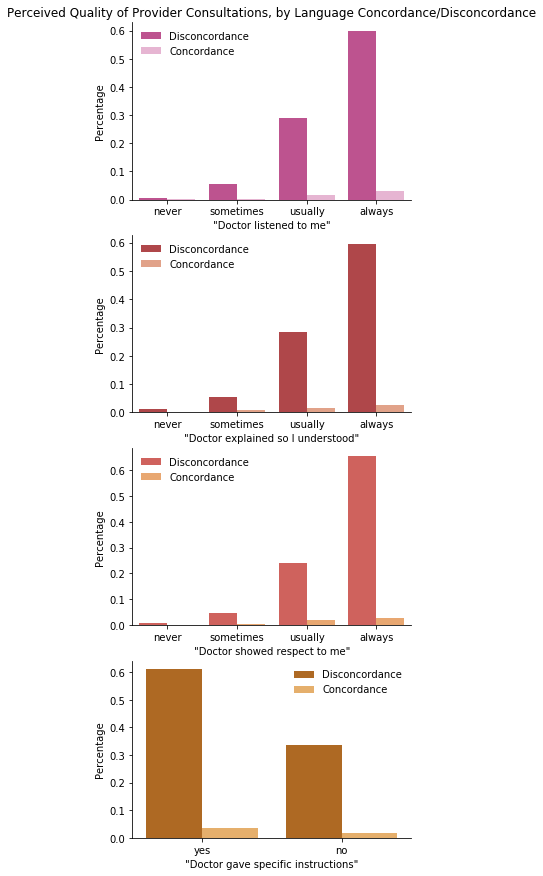

In [386]:
#Here's a figure showing perceived consultation quality among LEP patients

fig, (ax0,ax1,ax2,ax3) = plt.subplots(4,figsize = (5,15))
poor_all['adlist42'+'_pct'] = poor_all.groupby(['prvspk42', 'adlist42'])['adlist42'].transform(lambda x: len(x)) / len(poor_all)
ax0=sns.barplot(x='adlist42', y='adlist42'+'_pct', hue='prvspk42', data=poor_all, palette = sns.color_palette('PiYG'),ax = ax0)

poor_all['adexpl42'+'_pct'] = poor_all.groupby(['prvspk42', 'adexpl42'])['adexpl42'].transform(lambda x: len(x)) / len(poor_all)
ax1=sns.barplot(x='adexpl42', y='adexpl42'+'_pct', hue='prvspk42', data=poor_all, palette = sns.color_palette('RdBu'),ax = ax1)

poor_all['adresp42'+'_pct'] = poor_all.groupby(['prvspk42', 'adresp42'])['adresp42'].transform(lambda x: len(x)) / len(poor_all)
ax2=sns.barplot(x='adresp42', y='adresp42'+'_pct', hue='prvspk42', data=poor_all, palette = sns.color_palette('Spectral'),ax = ax2)

poor_all['adinst42'+'_pct'] = poor_all.groupby(['prvspk42', 'adinst42'])['adinst42'].transform(lambda x: len(x)) / len(poor_all)
ax3=sns.barplot(x='adinst42', y='adinst42'+'_pct', hue='prvspk42', data=poor_all, palette = sns.color_palette('PuOr'),ax = ax3)

ax0.set_xticklabels(['never','sometimes','usually','always'])
ax1.set_xticklabels(['never','sometimes','usually','always'])
ax2.set_xticklabels(['never','sometimes','usually','always'])
ax3.set_xticklabels(['yes','no'])

ax0.set_xlabel('"Doctor listened to me"')
ax1.set_xlabel('"Doctor explained so I understood"')
ax2.set_xlabel('"Doctor showed respect to me"')
ax3.set_xlabel('"Doctor gave specific instructions"')

ax0.set_ylabel('Percentage')
ax1.set_ylabel('Percentage')
ax2.set_ylabel('Percentage')
ax3.set_ylabel('Percentage')

handles, _ = ax0.get_legend_handles_labels()
ax0.legend(handles, ["Disconcordance", "Concordance"],frameon=False)
handles, _ = ax1.get_legend_handles_labels()
ax1.legend(handles, ["Disconcordance", "Concordance"],frameon=False)
handles, _ = ax2.get_legend_handles_labels()
ax2.legend(handles, ["Disconcordance", "Concordance"],frameon=False)
handles, _ = ax3.get_legend_handles_labels()
ax3.legend(handles, ["Disconcordance", "Concordance"],frameon=False)

ax0.set_title('Perceived Quality of Provider Consultations, by Language Concordance/Disconcordance')
sns.despine() 
plt.show()

In [387]:
#I need to run a logit regression, and since the quality variables are coded from 1(never) to 4(always), I need to recode these 4 categories into 2 categories. 
#I recode 1(never) and 2(sometime) to 0, and 3(usually) and 4(always) to 1.
#For variable "adhecr42", this is a rating of overall quality of health services, it ranges from 0 (worst) to 10(best), I recode 0-5 to 0, and 6-10 to 1.

poor_all['adlist42'] = poor_all.adlist42.map({1:0, 2:0, 3:1, 4:1})
poor_all['adexpl42'] = poor_all.adexpl42.map({1:0, 2:0, 3:1, 4:1})
poor_all['adresp42'] = poor_all.adresp42.map({1:0, 2:0, 3:1, 4:1})
poor_all['adprtm42'] = poor_all.adprtm42.map({1:0, 2:0, 3:1, 4:1})
poor_all['adinst42'] = poor_all.adinst42.map({1:1, 2:0})
poor_all['adhecr42'] = poor_all.adhecr42.map({0:0,1:0,2:0,3:0,4:0,5:0,6:1,7:1,8:1,9:1,10:1})
poor_all['prvspk42'] = poor_all.prvspk42.map({1:1, 2:0})
poor_all.head()

,age15x,sex,racethx,hideg,povcat15,hwellspe,prvspk42,adappt42,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42,rthlth53,mnhlth31,adlist42_pct,adexpl42_pct,adresp42_pct,adinst42_pct
10653,85.0,1.0,1.0,3.0,4.0,4.0,1,2.0,1,0,0,0,0,1,3.0,4.0,0.598901,0.055632,0.046703,0.336538
16592,53.0,1.0,1.0,3.0,4.0,3.0,1,6.0,1,1,1,1,0,1,4.0,4.0,0.598901,0.596841,0.653159,0.336538
16593,51.0,2.0,1.0,1.0,4.0,3.0,1,2.0,1,1,1,1,0,1,4.0,3.0,0.289148,0.283654,0.239698,0.336538
16600,61.0,2.0,4.0,3.0,5.0,3.0,1,1.0,1,1,1,1,0,1,3.0,2.0,0.598901,0.596841,0.653159,0.336538
16601,72.0,1.0,4.0,3.0,5.0,3.0,1,4.0,1,1,1,1,1,1,5.0,5.0,0.289148,0.283654,0.239698,0.611951


In [388]:
#For LEP patients, I will do some chi-squared tests to see the association between in consultation quality variables and provider language concordance/disconcordance
#This is to test "doctor listened to you" and concordance/disconcordance.
cont1 = pd.crosstab(poor_all["adlist42"],poor_all["prvspk42"])
print(cont1)
scipy.stats.chi2_contingency(cont1)

prvspk42   0     1
adlist42          
0          6    88
1         69  1293


(0.10077028573002315,
 0.7509072119534169,
 1,
 array([[   4.84203297,   89.15796703],
        [  70.15796703, 1291.84203297]]))

In [389]:
#This is to test "doctor explained so I understood" and concordance/disconcordance.
cont2 = pd.crosstab(poor_all["adexpl42"],poor_all["prvspk42"])
print(cont2)
scipy.stats.chi2_contingency(cont2)

prvspk42   0     1
adexpl42          
0         14    99
1         61  1282


(11.580125652081115,
 0.0006666043712297411,
 1,
 array([[   5.82074176,  107.17925824],
        [  69.17925824, 1273.82074176]]))

In [390]:
#This is to test "doctor showed respect" and concordance/disconcordance.
cont3 = pd.crosstab(poor_all["adresp42"],poor_all["prvspk42"])
print(cont3)
scipy.stats.chi2_contingency(cont3)

prvspk42   0     1
adresp42          
0          7    81
1         68  1300


(0.9578195358568083,
 0.3277368562367681,
 1,
 array([[   4.53296703,   83.46703297],
        [  70.46703297, 1297.53296703]]))

In [391]:
#This is to test "doctor spent enough time with you" and concordance/disconcordance.
cont4 = pd.crosstab(poor_all["adprtm42"],poor_all["prvspk42"])
print(cont4)
scipy.stats.chi2_contingency(cont4)

prvspk42   0     1
adprtm42          
0         12   125
1         63  1256


(3.2554825559668954,
 0.07118498163949036,
 1,
 array([[   7.05700549,  129.94299451],
        [  67.94299451, 1251.05700549]]))

In [392]:
#This is to test "doctor gave specific instructions" and concordance/disconcordance.
cont5 = pd.crosstab(poor_all["adinst42"],poor_all["prvspk42"])
print(cont5)
scipy.stats.chi2_contingency(cont5)

prvspk42   0    1
adinst42         
0         24  490
1         51  891


(0.240477246435981, 0.623861634575266, 1, array([[ 26.47664835, 487.52335165],
        [ 48.52335165, 893.47664835]]))

In [393]:
#This is to test the overall quality ratings and concordance/disconcordance.
cont6 = pd.crosstab(poor_all["adhecr42"],poor_all["prvspk42"])
print(cont6)
scipy.stats.chi2_contingency(cont6)

prvspk42   0     1
adhecr42          
0         11    92
1         64  1289


(5.769784763411876,
 0.01630403128503687,
 1,
 array([[   5.30563187,   97.69436813],
        [  69.69436813, 1283.30563187]]))

In [394]:
#I think that some consultation quality variables might be correlated with each other, so here's the correlation matrix heat map.
poor_all.drop(['age15x', 'sex', 'racethx','hideg','povcat15','hwellspe','prvspk42','adappt42','rthlth53','mnhlth31','adlist42_pct','adexpl42_pct','adresp42_pct','adinst42_pct'], axis=1).corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('Pastel1'), axis=1)

,adlist42,adexpl42,adresp42,adprtm42,adinst42,adhecr42
adlist42,1.0,0.47,0.52,0.41,0.069,0.36
adexpl42,0.47,1.0,0.5,0.4,0.092,0.31
adresp42,0.52,0.5,1.0,0.53,0.072,0.35
adprtm42,0.41,0.4,0.53,1.0,0.062,0.28
adinst42,0.069,0.092,0.072,0.062,1.0,0.032
adhecr42,0.36,0.31,0.35,0.28,0.032,1.0


In [395]:
#Then I will run some probit regressions, the dependent variable is each of the quality variables, the independent variable is the language concordance/disconcordance variable "prvspk42", control variables are gender, age, income, race, education, self-rated health, self-rated mental health
#This regression the dependent variable is "doctor listened to me" 
poor_log1 = smf.probit('adlist42 ~ age15x + sex + racethx + hideg + povcat15 + prvspk42 + rthlth53 + mnhlth31', data=poor_all).fit()

print(poor_log1.summary())

Optimization terminated successfully.
         Current function value: 0.232688
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               adlist42   No. Observations:                 1456
Model:                         Probit   Df Residuals:                     1447
Method:                           MLE   Df Model:                            8
Date:                Fri, 14 Dec 2018   Pseudo R-squ.:                 0.02777
Time:                        22:03:15   Log-Likelihood:                -338.79
converged:                       True   LL-Null:                       -348.47
                                        LLR p-value:                   0.01306
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5228      0.420      3.625      0.000       0.699       2.346
age15x         0.0118      0.

In [396]:
#To get marginal change in predicted probability of "doctor listened to me" as the independent variables change.
probit_marg1 = poor_log1.get_margeff(at ='mean')
print(probit_marg1.summary())

       Probit Marginal Effects       
Dep. Variable:               adlist42
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age15x         0.0014      0.000      3.259      0.001       0.001       0.002
sex            0.0024      0.013      0.177      0.859      -0.024       0.029
racethx       -0.0060      0.006     -1.059      0.289      -0.017       0.005
hideg          0.0006      0.005      0.119      0.905      -0.009       0.010
povcat15        6e-05      0.005      0.013      0.990      -0.009       0.009
prvspk42       0.0065      0.027      0.247      0.805      -0.046       0.059
rthlth53      -0.0182      0.006     -2.827      0.005      -0.031      -0.006
mnhlth31      -0.0086      0.006     -1.397      0.162      -0.021       0.003


In [397]:
poor_log2 = smf.probit('adexpl42 ~ age15x + sex + racethx + hideg + povcat15 + prvspk42 + rthlth53 + mnhlth31', data=poor_all).fit()
#This regression the dependent variable is "doctor explained so I understood" 
print(poor_log2.summary())

Optimization terminated successfully.
         Current function value: 0.263969
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               adexpl42   No. Observations:                 1456
Model:                         Probit   Df Residuals:                     1447
Method:                           MLE   Df Model:                            8
Date:                Fri, 14 Dec 2018   Pseudo R-squ.:                 0.03270
Time:                        22:03:15   Log-Likelihood:                -384.34
converged:                       True   LL-Null:                       -397.33
                                        LLR p-value:                  0.001056
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1864      0.385      3.084      0.002       0.432       1.940
age15x         0.0064      0.

In [398]:
#To get marginal change in predicted probability of "doctor explained so I understood" as the independent variables change.
probit_marg2 = poor_log2.get_margeff(at ='mean')
print(probit_marg2.summary())

       Probit Marginal Effects       
Dep. Variable:               adexpl42
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age15x         0.0009      0.000      1.915      0.055   -2.06e-05       0.002
sex            0.0041      0.015      0.276      0.782      -0.025       0.033
racethx     2.445e-05      0.006      0.004      0.997      -0.013       0.013
hideg          0.0015      0.005      0.284      0.776      -0.009       0.011
povcat15      -0.0005      0.005     -0.106      0.915      -0.010       0.009
prvspk42       0.0735      0.025      2.971      0.003       0.025       0.122
rthlth53      -0.0174      0.007     -2.438      0.015      -0.031      -0.003
mnhlth31      -0.0144      0.007     -2.145      0.032      -0.028      -0.001


In [399]:
poor_log3 = smf.probit('adresp42 ~ age15x + sex + racethx + hideg + povcat15 + prvspk42 + rthlth53 + mnhlth31', data=poor_all).fit()
#This regression the dependent variable is "doctor showed respect" 
print(poor_log3.summary())

Optimization terminated successfully.
         Current function value: 0.221087
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:               adresp42   No. Observations:                 1456
Model:                         Probit   Df Residuals:                     1447
Method:                           MLE   Df Model:                            8
Date:                Fri, 14 Dec 2018   Pseudo R-squ.:                 0.03107
Time:                        22:03:15   Log-Likelihood:                -321.90
converged:                       True   LL-Null:                       -332.22
                                        LLR p-value:                  0.008161
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2262      0.433      5.141      0.000       1.378       3.075
age15x         0.0045      0.

In [400]:
#To get marginal change in predicted probability of "doctor showed repect" as the independent variables change.
probit_marg3 = poor_log3.get_margeff(at ='mean')
print(probit_marg3.summary())

       Probit Marginal Effects       
Dep. Variable:               adresp42
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age15x         0.0005      0.000      1.228      0.219      -0.000       0.001
sex           -0.0137      0.013     -1.033      0.302      -0.040       0.012
racethx       -0.0042      0.005     -0.768      0.442      -0.015       0.006
hideg          0.0043      0.005      0.917      0.359      -0.005       0.013
povcat15      -0.0041      0.004     -0.921      0.357      -0.013       0.005
prvspk42       0.0177      0.024      0.739      0.460      -0.029       0.065
rthlth53      -0.0166      0.006     -2.622      0.009      -0.029      -0.004
mnhlth31      -0.0129      0.006     -2.190      0.029      -0.024      -0.001


In [401]:
poor_log4 = smf.probit('adprtm42 ~ age15x + sex + racethx + hideg + povcat15 + prvspk42 + rthlth53 + mnhlth31', data=poor_all).fit()
#This regression the dependent variable is "doctor spent enough time with me" 
print(poor_log4.summary())

Optimization terminated successfully.
         Current function value: 0.305716
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               adprtm42   No. Observations:                 1456
Model:                         Probit   Df Residuals:                     1447
Method:                           MLE   Df Model:                            8
Date:                Fri, 14 Dec 2018   Pseudo R-squ.:                 0.01985
Time:                        22:03:15   Log-Likelihood:                -445.12
converged:                       True   LL-Null:                       -454.14
                                        LLR p-value:                   0.02100
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3026      0.363      3.593      0.000       0.592       2.013
age15x         0.0075      0.

In [402]:
#To get marginal change in predicted probability of "doctor spent enough time with me" as the independent variables change.
probit_marg4 = poor_log4.get_margeff(at ='mean')
print(probit_marg4.summary())

       Probit Marginal Effects       
Dep. Variable:               adprtm42
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age15x         0.0012      0.001      2.332      0.020       0.000       0.002
sex           -0.0071      0.016     -0.432      0.666      -0.039       0.025
racethx     6.874e-05      0.007      0.010      0.992      -0.014       0.014
hideg         -0.0059      0.005     -1.122      0.262      -0.016       0.004
povcat15      -0.0017      0.006     -0.303      0.762      -0.013       0.009
prvspk42       0.0514      0.030      1.724      0.085      -0.007       0.110
rthlth53      -0.0149      0.008     -1.909      0.056      -0.030       0.000
mnhlth31      -0.0153      0.007     -2.042      0.041      -0.030      -0.001


In [403]:
poor_log5 = smf.probit('adinst42 ~ age15x + sex + racethx + hideg + povcat15 + prvspk42 + rthlth53 + mnhlth31', data=poor_all).fit()
#This regression the dependent variable is "doctor gave specific instructions" 
print(poor_log5.summary())

Optimization terminated successfully.
         Current function value: 0.636404
         Iterations 5
                          Probit Regression Results                           
Dep. Variable:               adinst42   No. Observations:                 1456
Model:                         Probit   Df Residuals:                     1447
Method:                           MLE   Df Model:                            8
Date:                Fri, 14 Dec 2018   Pseudo R-squ.:                 0.01986
Time:                        22:03:15   Log-Likelihood:                -926.60
converged:                       True   LL-Null:                       -945.38
                                        LLR p-value:                 9.132e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4775      0.279     -1.711      0.087      -1.024       0.069
age15x        -0.0019      0.

In [404]:
#To get marginal change in predicted probability of "doctor gave specific instructions" as the independent variables change.
probit_marg5 = poor_log5.get_margeff(at ='mean')
print(probit_marg5.summary())

       Probit Marginal Effects       
Dep. Variable:               adinst42
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age15x        -0.0007      0.001     -0.833      0.405      -0.002       0.001
sex            0.0335      0.027      1.227      0.220      -0.020       0.087
racethx        0.0036      0.012      0.299      0.765      -0.020       0.027
hideg          0.0326      0.010      3.310      0.001       0.013       0.052
povcat15       0.0324      0.009      3.449      0.001       0.014       0.051
prvspk42      -0.0144      0.058     -0.249      0.803      -0.128       0.099
rthlth53       0.0349      0.013      2.704      0.007       0.010       0.060
mnhlth31       0.0224      0.013      1.776      0.076      -0.002       0.047


In [405]:
poor_log6 = smf.probit('adhecr42 ~ age15x + sex + racethx + hideg + povcat15 + prvspk42 + rthlth53 + mnhlth31', data=poor_all).fit()
#This regression the dependent variable is overall quality rating of health services
print(poor_log6.summary())

Optimization terminated successfully.
         Current function value: 0.246817
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               adhecr42   No. Observations:                 1456
Model:                         Probit   Df Residuals:                     1447
Method:                           MLE   Df Model:                            8
Date:                Fri, 14 Dec 2018   Pseudo R-squ.:                 0.03419
Time:                        22:03:15   Log-Likelihood:                -359.37
converged:                       True   LL-Null:                       -372.09
                                        LLR p-value:                  0.001309
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2264      0.398      3.078      0.002       0.445       2.007
age15x         0.0110      0.

In [406]:
#To get marginal change in predicted probability of overall quality rating as the independent variables change.
probit_marg6 = poor_log6.get_margeff(at ='mean')
print(probit_marg6.summary())

       Probit Marginal Effects       
Dep. Variable:               adhecr42
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age15x         0.0014      0.000      3.099      0.002       0.001       0.002
sex           -0.0067      0.014     -0.469      0.639      -0.035       0.021
racethx       -0.0077      0.006     -1.316      0.188      -0.019       0.004
hideg          0.0053      0.005      1.050      0.294      -0.005       0.015
povcat15      -0.0007      0.005     -0.141      0.888      -0.010       0.009
prvspk42       0.0489      0.024      2.037      0.042       0.002       0.096
rthlth53      -0.0229      0.007     -3.392      0.001      -0.036      -0.010
mnhlth31      -0.0011      0.006     -0.175      0.861      -0.014       0.011
